<a href="https://colab.research.google.com/github/juhee3199/DeepLearning-keras/blob/main/tutorial/CNN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 일반신경망 NN과 CNN의 차이

- 공통점: feed forward를 수행한 후, 손실함수가 최소가 되도록 opimizer를 수행하여 Weight와 bias를 업데이트

- 일반 신경망과 동일하지만,
일반 신경망의 은닉층에 해당하는 부분이 conv layer와 FC layer로 구성되어있다는 점이 차이이다.

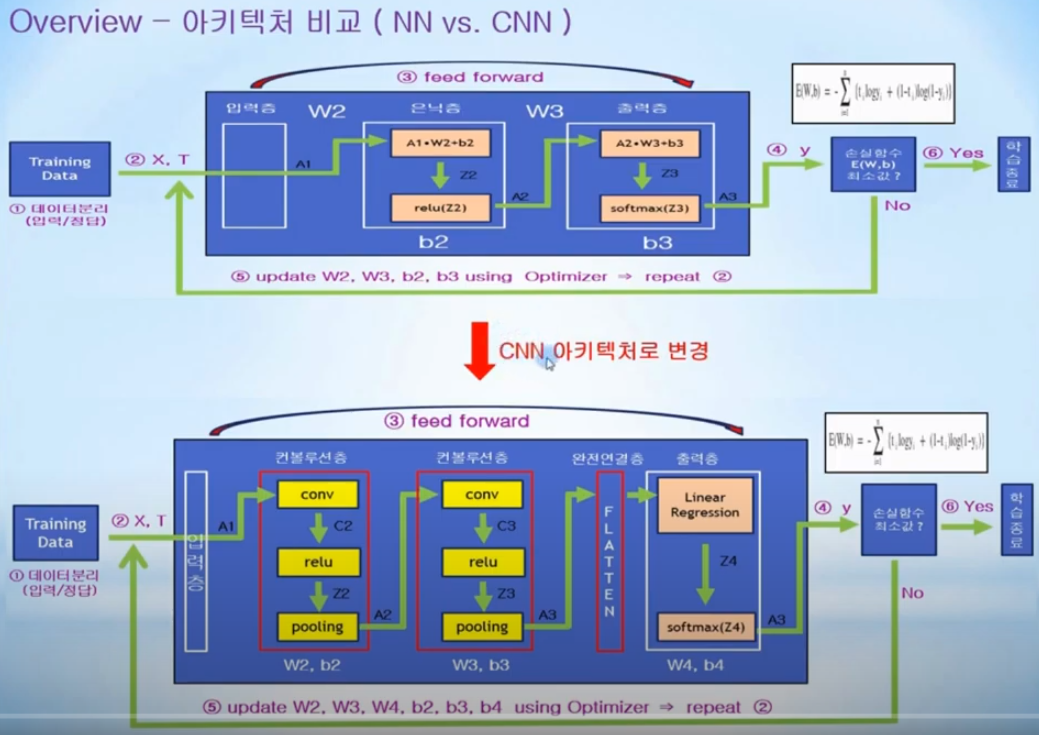

# CNN 구현 - MNIST



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 3차원 텐서로 변환 (높이, 너비, 채널)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# 정규화 0~1 사이의 값으로
x_train = x_train.astype(np.float32) / 255.0
x_train = x_train.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [15]:
# 모델 구축

cnn = Sequential() 
# inpu_shape = (높이, 너비, 채널) 
# 3*3 filter가 32개
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten()) # 3차원 텐서를 1차원 벡터로 변환
cnn.add(Dense(128, activation='relu')) # 은닉층 개념
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax')) #출력층

cnn.summary()
# output shape(none, 높이, 너비, 채널개수)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [18]:
# 모델 컴파일 및 학습
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 144s 305ms/step - loss: 1.5566 - accuracy: 0.4654 - val_loss: 7954.1152 - val_accuracy: 0.8776
Epoch 2/30
469/469 [==============================] - 144s 308ms/step - loss: 0.4748 - accuracy: 0.8579 - val_loss: 6880.2505 - val_accuracy: 0.9132
Epoch 3/30
469/469 [==============================] - 145s 310ms/step - loss: 0.4025 - accuracy: 0.8771 - val_loss: 5445.1304 - val_accuracy: 0.9294
Epoch 4/30
469/469 [==============================] - 144s 306ms/step - loss: 0.3730 - accuracy: 0.8862 - val_loss: 4449.0166 - val_accuracy: 0.9406
Epoch 5/30
469/469 [==============================] - 144s 308ms/step - loss: 0.3531 - accuracy: 0.8918 - val_loss: 4804.4932 - val_accuracy: 0.9386
Epoch 6/30
469/469 [==============================] - 144s 307ms/step - loss: 0.3262 - accuracy: 0.8989 - val_loss: 5320.9546 - val_accuracy: 0.9301
Epoch 7/30
469/469 [==============================] - 144s 307ms/step - loss: 0.3196 - accuracy: 0.9002 - 

In [ ]:
# 모델 정확도 평가
cnn.evaluate(x_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

# 정확도 비교

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
# 손실 비교

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()